# Lecture 7: Richardson extrapolation

Given a numerical method $F(\Delta)$ with known dependence on some stepsize $\Delta$,

$$
F(\Delta) = F(0) + A\, \Delta^p + \mathcal{O}(\Delta^{p+1}),
$$

where $F(0)$ is the exact value and $A$ is a constant, we can construct a higher order
approximation:

$$
F^{\text{Richardson}}(\Delta) = \frac{t^p\, F(\Delta/t) - F(\Delta)}{t^p - 1} = F(0) + \mathcal{O}(\Delta^{p+1}),
$$

where a common choice may be $t=2,3,4$.

In [1]:
using PyPlot
PyPlot.svg(true)

true

In [2]:
function richardson_extrapolate(F, Δ, t, p)
    """ Take a numerical method F(Δ) of order p and return its Richardson
    extrapolated version.
    """
    
    return (t^p * F(Δ/t) - F(Δ))/(t^p - 1)
end

richardson_extrapolate (generic function with 1 method)

## Example: Numerical Quadrature

In [3]:
# Example: The trapezoid rule function from Lecture 2
function trapezoid_rule(f, a, b, N)
    Δ = (b - a)/N
    
    I = 0.5*Δ*f(a) + 0.5*Δ*f(b)
    for n=1:N-1
        I += Δ*f(a + n*Δ)
    end
    
    return I
end

trapezoid_rule (generic function with 1 method)

We consider the integral

$$
I = \int_1^2 \log^2(x)\, dx = 2 (\log(2) - 1)^2,
$$

and compute the relative errors for the trapezoid rule and its Richardson extrapolation.

In [4]:
exact = 2*(log(2) - 1)^2

f(x) = log(x)^2

# bring the trapezoid rule function into the right form
# for Richardson extrapolation
F_trapezoid(Δ) = trapezoid_rule(f, 1, 2, trunc(Int, 1.0/Δ))

F_trapezoid (generic function with 1 method)

In [10]:
F_trapezoid(0.033) - exact

6.417070261383051e-5

In [8]:
# Trapezoid rule has p=2
richardson_extrapolate(F_trapezoid, 0.1, 2.0, 2.0) - exact

1.933229902828515e-7

In [11]:
Δs = 10.0.^(LinRange(-3, -1, 10))

errors_trapezoid = abs.([ (F_trapezoid(Δ) .- exact)./exact for Δ in Δs ])
errors_richardson_2 = abs.([ (richardson_extrapolate(F_trapezoid, Δ, 2.0, 2.0) .- exact)./exact for Δ in Δs ])
errors_richardson_3 = abs.([ (richardson_extrapolate(F_trapezoid, Δ, 3.0, 2.0) .- exact)./exact for Δ in Δs ])
errors_richardson_4 = abs.([ (richardson_extrapolate(F_trapezoid, Δ, 4.0, 2.0) .- exact)./exact for Δ in Δs ]);

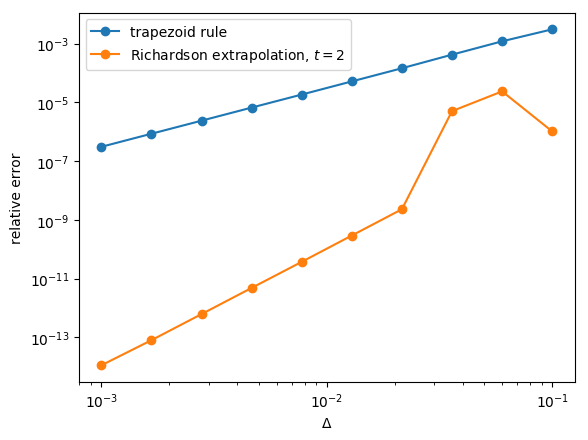

PyObject Text(24.000000000000007, 0.5, 'relative error')

In [15]:
figure()

loglog(Δs, errors_trapezoid, "o-", label="trapezoid rule")
loglog(Δs, errors_richardson_2, "o-", label=L"Richardson extrapolation, $t=2$")
# loglog(Δs, errors_richardson_3, "o-", label=L"Richardson extrapolation, $t=3$")
# loglog(Δs, errors_richardson_4, "o-", label=L"Richardson extrapolation, $t=4$")

legend()
xlabel("Δ")
ylabel("relative error")